# Title: "Game sales marketing research"

### Project description
For an online game shop:
- Analyze and provide recommendations about sales of video games by genre, platform, region e.t.c. 
- Validate the influence of different factors, such as ratings, historical indicators, and so on.

### Data Description
`games.csv`

- *Name*: Name
- *Platform*: Platform
- *Year_of_Release*: Year of Release
- *Genre*: Genre
- *NA_sales*: sales in North American in USD million
- *EU_sales*: sales in Europe in USD million
- *JP_sales*: sales in Japan in USD million
- *Other_sales*: sales in other countries in USD million
- *Critic_Score*: maximum of 100
- *User_Score*: maximum of 10
- *Rating*: ESRB - The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature

### Decomposition:
- Analyze games released by years
- Analyze sales by platform
- Plot distributions 
- Investigate popularity lenghts
- Determine profitable platforms
- Build a box plot for the global sales of games, broken down by platform
- Investigate how reviews affect sales
- Analyze genres
- Analyze regions by platforms/market share/genres

___

#### Preprocesing

In [1]:
import pandas as pd

pd.set_option('display.max_columns', 40)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

from scipy import stats as st

In [2]:
try:
    path = '/datasets/games.csv'
    games = pd.read_csv(path, sep=',' )
except:
    path = 'C:\\Users\\Yuri\\Downloads\\SprintIntProject1\\games.csv'
    games = pd.read_csv(path, sep=',' )
    
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Column names lowercase

In [4]:
games.columns.str.lower()

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
games.columns = games.columns.str.lower()

In [6]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### NA and Duplicates

#### name

In [7]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


I have no idea what these game are, the year is relatively old and the platform is not important for us now. I'll delete them.

In [8]:
games = games[games['name'].notnull()]

In [9]:
games['name'].isnull().sum()

0

trim for whitespaces

In [10]:
games['name'] = games['name'].str.strip()

duplicates

In [11]:
games[games[['name','platform']].duplicated(keep=False)==True].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


'Madden NFL 13' index 16320 looks like error - I'll delete it

In [12]:
ind_to_del = games[(games[['name','platform']].duplicated(keep='first')==True) & (games['name'] == 'Madden NFL 13')].index

In [13]:
ind_to_del

Int64Index([16230], dtype='int64')

In [14]:
games = games[~games.index.isin(ind_to_del)]

I see that 'Need for Speed: Most Wanted' are not duplicates, because it has few releases for both platforms.


'Sonic the Hedgehog' index 4127 looks like error and I've checked there was no another version for another year. In this case I'll delete the row, but will keep the highest values for sales.

In [15]:
games[(games[['name','platform']].duplicated(keep=False)==True) & (games['name'] == 'Sonic the Hedgehog')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


In [16]:
df = games[(games[['name','platform']].duplicated(keep=False)==True) & (games['name'] == 'Sonic the Hedgehog')]

In [17]:
df.iloc[0]

name               Sonic the Hedgehog
platform                          PS3
year_of_release                  2006
genre                        Platform
na_sales                         0.41
eu_sales                         0.06
jp_sales                         0.04
other_sales                      0.66
critic_score                       43
user_score                        4.1
rating                           E10+
Name: 1745, dtype: object

In [18]:
df.iloc[0] = df.max(axis=0)

C:\Users\Yuri\anaconda3\lib\site-packages\pandas\core\indexing.py:1760: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [19]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.48,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


In [20]:
games.loc[df.iloc[[0]].index] = df.iloc[[0]]

In [21]:
games.loc[df.iloc[[0]].index] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.48,0.04,0.66,43.0,4.1,E10+


In [22]:
ind_to_del = games[(games[['name','platform']].duplicated(keep='first')==True) & (games['name'] == 'Sonic the Hedgehog')].index

In [23]:
ind_to_del

Int64Index([4127], dtype='int64')

In [24]:
games = games[~games.index.isin(ind_to_del)]

In [25]:
games[games[['name','platform']].duplicated(keep=False)==True].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T


#### platform

In [26]:
platforms = games['platform'].unique().tolist()

In [27]:
sorted(platforms)

['2600',
 '3DO',
 '3DS',
 'DC',
 'DS',
 'GB',
 'GBA',
 'GC',
 'GEN',
 'GG',
 'N64',
 'NES',
 'NG',
 'PC',
 'PCFX',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SCD',
 'SNES',
 'TG16',
 'WS',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

In [28]:
print ('We have {} platforms'.format( len(platforms)))

We have 31 platforms


No duplicates, but for lots of them the lifespan is already over. I'll check it up more precisesly later. 

#### year_of_release

In [29]:
games[games['year_of_release'].isnull()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6019,Nicktoons: Battle for Volcano Island,GC,NaN,Action,0.22,0.06,0.00,0.01,NaN,7,E
4437,Super Breakout,2600,NaN,Puzzle,0.41,0.03,0.00,0.00,NaN,NaN,NaN
4337,Maze Craze: A Game of Cops 'n Robbers,2600,NaN,Action,0.42,0.02,0.00,0.00,NaN,NaN,NaN
12584,Combat Elite: WWII Paratroopers,PS2,NaN,Shooter,0.03,0.02,0.00,0.01,54.0,tbd,T
7584,WRC: FIA World Rally Championship,PS3,NaN,Racing,0.00,0.14,0.01,0.04,68.0,4.5,NaN
15119,Legacy of Ys: Books I & II,DS,NaN,Role-Playing,0.02,0.00,0.00,0.00,NaN,NaN,NaN
3024,"The Chronicles of Narnia: The Lion, The Witch ...",GBA,NaN,Action,0.48,0.18,0.00,0.01,66.0,6.8,E
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.00,0.01,0.00,0.00,65.0,NaN,RP
15816,Without Warning,XB,NaN,Shooter,0.01,0.00,0.00,0.00,45.0,2,M


I'll try to assign unknown year of release by the name of the game where we have it. Becase as usual a game is being created for all target platforms simultaniously. 

In [30]:
name_to_year_dict = games.groupby('name')['year_of_release'].max().to_dict()

In [31]:
games.apply(lambda row: name_to_year_dict[row['name']] if np.isnan(row['year_of_release']) else row['year_of_release']
            ,axis=1           ).head()

0    2006.0
1    1985.0
2    2008.0
3    2009.0
4    1996.0
dtype: float64

In [32]:
games['year_of_release'] = games.apply(lambda row: name_to_year_dict[row['name']] if np.isnan(row['year_of_release']) else row['year_of_release']
            ,axis=1           )

In [33]:
games['year_of_release'].isnull().sum()

146

In [34]:
games['year_of_release'].isnull().sum() / len(games)

0.008736760217820598

We still have na values, but amount of them is less than 1% of the data.Hence I prefer to get rid of them.

In [35]:
games = games[~games['year_of_release'].isnull()]

In [36]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16565 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16565 non-null  object 
 1   platform         16565 non-null  object 
 2   year_of_release  16565 non-null  float64
 3   genre            16565 non-null  object 
 4   na_sales         16565 non-null  float64
 5   eu_sales         16565 non-null  float64
 6   jp_sales         16565 non-null  float64
 7   other_sales      16565 non-null  float64
 8   critic_score     8073 non-null   float64
 9   user_score       9932 non-null   object 
 10  rating           9866 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### critic_score

In [37]:
games[games['critic_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


I can see, that we have nan values for old games and for new games as well. The number is signifigant.

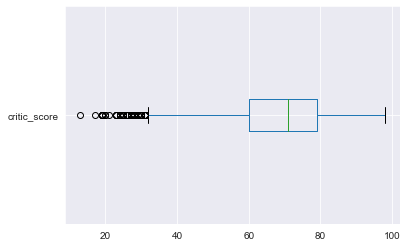

In [38]:
games.boxplot(column='critic_score', vert=False)
plt.show()

C:\Users\Yuri\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


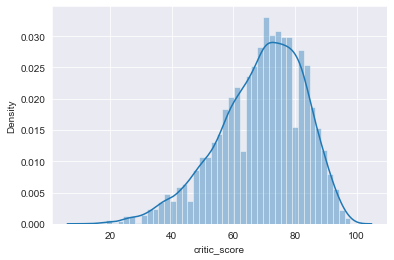

In [39]:
sns.distplot(games['critic_score'])
plt.show()

In [40]:
games['critic_score'].describe()

count    8073.000000
mean       68.993435
std        13.921229
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

the distribution of 'critic_score' has left tail and skeweness to the left and that is why left outliers could influence on the central value.

I'd like to analyze critic_score distribution by platform, year and genre

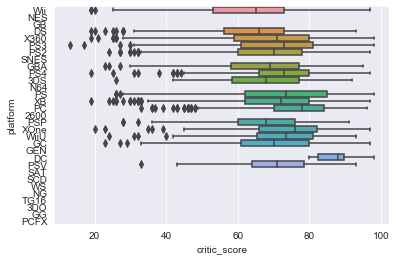

In [41]:
sns.boxplot(data = games, x='critic_score', y='platform')
plt.show()

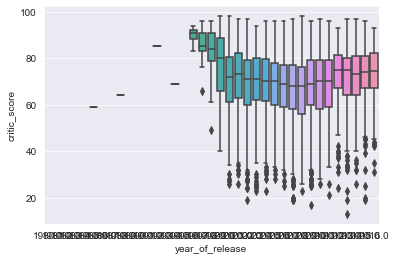

In [42]:
sns.boxplot(data = games, y='critic_score', x='year_of_release')
plt.show()

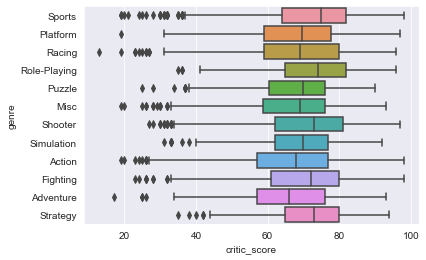

In [43]:
sns.boxplot(data = games, x='critic_score', y='genre')
plt.show()

I can see, that in general distribution of critic_score by genre is about equal.

By platform for some of them we don't have scores, for DC it is relatively high and for all the rest is about equal.

By years we had a start period 'without' rating, after that it had pozitive start gap and the recent years stabilizes in corridor 60-80.

In such conditions I'd like to replace na with median value and adjust if needed further.

In [44]:
games['critic_score'] = games['critic_score'].fillna(games['critic_score'].median())

In [45]:
games['critic_score'].isnull().sum()

0

#### user_score 

In [46]:
games[games['user_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,71.0,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,71.0,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,71.0,NaN,NaN


I can see, that we have nan values for old games and for new games as well. The number is signifigant.

In [47]:
games['user_score'].value_counts(dropna=False, normalize=True).head()

NaN    0.400423
tbd    0.144522
7.8    0.019559
8      0.017386
8.2    0.016843
Name: user_score, dtype: float64

In [48]:
games[games['user_score']=='tbd'].sort_values(by = 'year_of_release').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12833,Elemental Gearbolt,PS,1997.0,Shooter,0.03,0.02,0.0,0.00,76.0,tbd,T
3028,Pro Pinball: Big Race USA,PS,1999.0,Simulation,0.37,0.25,0.0,0.04,69.0,tbd,E
13951,Countdown Vampires,PS,1999.0,Adventure,0.02,0.01,0.0,0.00,41.0,tbd,M
4223,Razor Freestyle Scooter,PS,1999.0,Sports,0.26,0.17,0.0,0.03,65.0,tbd,E
9585,Surf Riders,PS,1999.0,Sports,0.07,0.05,0.0,0.01,64.0,tbd,E


We have special data as 'tbd' and the number is significant - about 14%

" TBD usually means "To be determined." The filmmakers either haven't got the rating back from the ratings board yet, or they got one they didn't like and are working to edit the movie to get the rating they want. " Wikipedia

So I assume that the rating for these games could be under rescoring, because we have it for all kinds of release years.

In this case I'll similize tbd to NaN values and will proceed them acordingly.

In [49]:
games['user_score'] = games['user_score'].replace('tbd',np.nan)

to proceed further I need to change the datatype for values in the column

In [50]:
games['user_score'] = games['user_score'].astype(float)

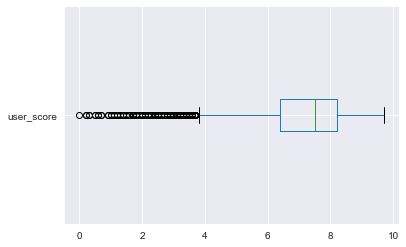

In [51]:
games.boxplot(column = 'user_score', vert=False)
plt.show()

C:\Users\Yuri\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


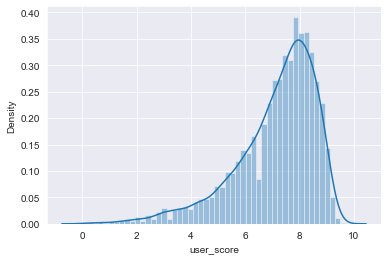

In [52]:
sns.distplot(games['user_score'])
plt.show()

In [53]:
games['user_score'].describe()

count    7538.000000
mean        7.125643
std         1.497931
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

the distribution of 'user_score' has longer left tail than "critic_score" and skeweness to the left and, so left outliers have even higher influence on the central value.

The same analysis for user_score as for critic_score: distribution by platform, year and genre

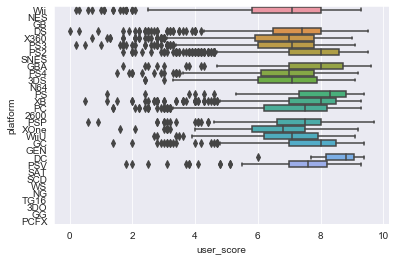

In [54]:
sns.boxplot(data = games, x='user_score', y='platform')
plt.show()

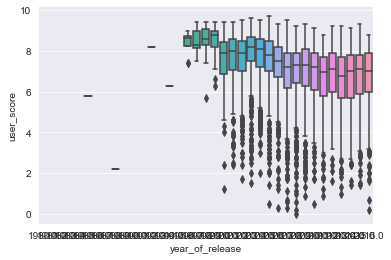

In [55]:
sns.boxplot(data = games, y='user_score', x='year_of_release')
plt.show()

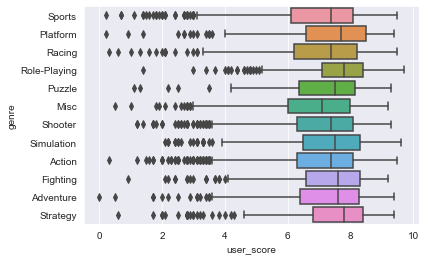

In [56]:
sns.boxplot(data = games, x='user_score', y='genre')
plt.show()

I can see, that in general we have higher volatility in all slices. I assume that it is because higher variety of users to critic or / and lack of methodology 

In such conditions I'd like to replace na with median value and adjust if needed further.

In [57]:
games['user_score'] = games['user_score'].fillna(games['user_score'].median())

In [58]:
games['user_score'].isnull().sum()

0

#### rating

In [59]:
games['rating'].value_counts(dropna=False)

NaN     6699
E       3957
T       2930
M       1554
E10+    1411
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

A lot of na values. I'll assign them to the group "unknow" to proceed with group analysis further.

In [60]:
games['rating'] = games['rating'].fillna('Unknown')

In [61]:
games['rating'].value_counts(dropna=False)

Unknown    6699
E          3957
T          2930
M          1554
E10+       1411
EC            8
K-A           3
RP            2
AO            1
Name: rating, dtype: int64

####  total sales (the sum of sales in all regions)  

In [62]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [63]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,7.5,Unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,Unknown,31.38


#### how many games were released in different years

In [64]:
games.groupby('year_of_release')['year_of_release'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     339
2000.0     350
2001.0     484
2002.0     845
2003.0     785
2004.0     765
2005.0     947
2006.0    1019
2007.0    1202
2008.0    1440
2009.0    1431
2010.0    1271
2011.0    1153
2012.0     661
2013.0     547
2014.0     582
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64

In [65]:
released = games.groupby('year_of_release')['year_of_release'].count()

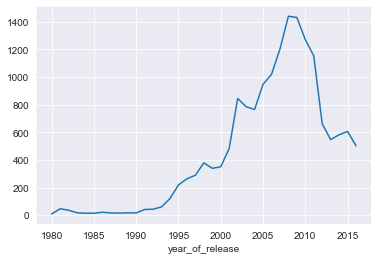

In [66]:
released.plot()
plt.show()

In [67]:
released.describe()

count      37.000000
mean      447.702703
std       455.916042
min         9.000000
25%        36.000000
50%       339.000000
75%       765.000000
max      1440.000000
Name: year_of_release, dtype: float64

I can notice one main peak: between 2005 and 2010

A smaller one between 2000 and 2005

And the smallest one between 1995 and 2000

20015 year as also looks like a small positive gap, but in 2016 we have decrease

C:\Users\Yuri\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


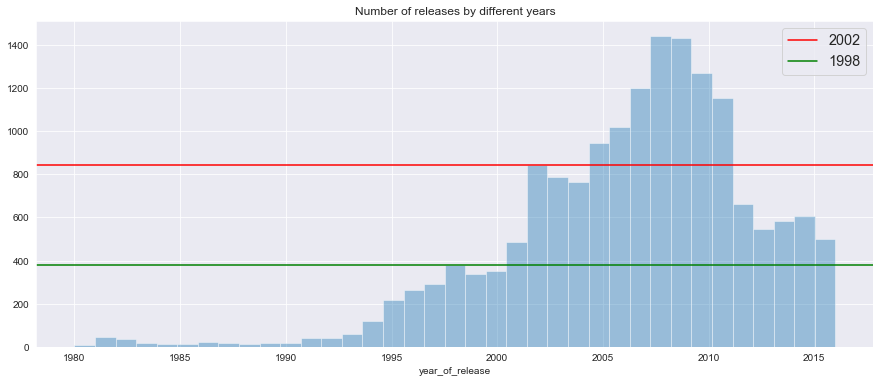

In [68]:
plt.figure(figsize=(15,6))

sns.distplot(games['year_of_release'], kde=False, bins= len(released))

plt.title('Number of releases by different years')
plt.axhline(released[2002], color='r')
plt.axhline(released[1998], color='g')

plt.legend(("2002", "1998"), fontsize="x-large")
plt.show()

I can mention that number of games is in the corridor of 1998-2002

I'd like to divide periods by decades and to test it I'll check average profit per game per year

In [69]:
games.groupby('year_of_release')['total_sales'].sum()

year_of_release
1980.0     11.38
1981.0     35.68
1982.0     28.88
1983.0     16.80
1984.0     50.35
1985.0     53.95
1986.0     37.08
1987.0     21.70
1988.0     47.21
1989.0     73.45
1990.0     49.37
1991.0     32.23
1992.0     76.16
1993.0     45.99
1994.0     79.23
1995.0     88.12
1996.0    199.15
1997.0    201.07
1998.0    256.31
1999.0    251.25
2000.0    201.66
2001.0    332.32
2002.0    403.64
2003.0    368.15
2004.0    419.63
2005.0    459.96
2006.0    523.59
2007.0    606.16
2008.0    680.44
2009.0    660.31
2010.0    595.63
2011.0    510.59
2012.0    360.51
2013.0    361.76
2014.0    331.88
2015.0    267.98
2016.0    129.94
Name: total_sales, dtype: float64

In [70]:
profits = games.groupby('year_of_release')['total_sales'].sum()

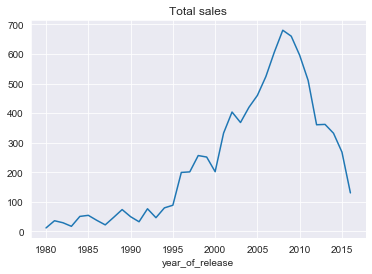

In [71]:
profits.plot()

plt.title('Total sales')
plt.show()

Importnant to mention here, that till 1995 we have market capacity 100.

I'll use it for platforms analysis

In [72]:
avg_profit = profits/released

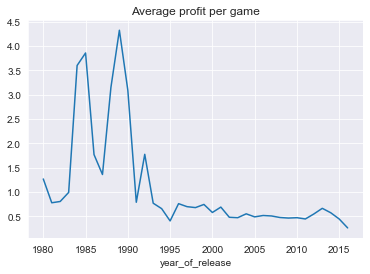

In [73]:
avg_profit.plot()

plt.title('Average profit per game')
plt.show()

In [74]:
avg_profit.describe()

count    37.000000
mean      1.102505
std       1.069276
min       0.258845
25%       0.485702
50%       0.676280
75%       0.988235
max       4.320588
dtype: float64

Period after 1995 looks relatively flat

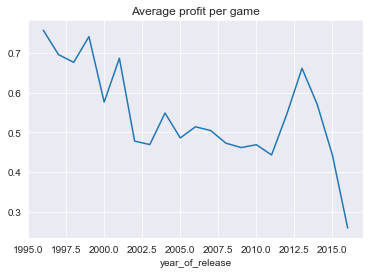

In [75]:
avg_profit[avg_profit.index>1995].plot()

plt.title('Average profit per game')
plt.show()

In [76]:
avg_profit[avg_profit.index>1995].describe()

count    21.000000
mean      0.545509
std       0.121674
min       0.258845
25%       0.468981
50%       0.513827
75%       0.661353
max       0.757224
dtype: float64

After zooming in we can see that in both graps there is a negative tendency last 3 years.

For now I can say, that data before 1995 is definitely not significant for us. The period after that is under consideration.

#### sales by platforms

Choose the platforms with the greatest total sales and build a distribution based on data for each year. 

Find platforms that used to
be popular but now have zero sales. 

How long does it generally take for new platforms to
appear and old ones to fade?


In [77]:
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1247.16
X360     966.61
PS3      935.12
Wii      903.31
DS       804.28
PS       727.58
PS4      314.14
GBA      313.73
PSP      293.57
PC       258.86
3DS      258.53
XB       256.69
GB       254.43
NES      251.05
N64      218.48
SNES     200.04
GC       198.66
XOne     159.32
2600      89.01
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

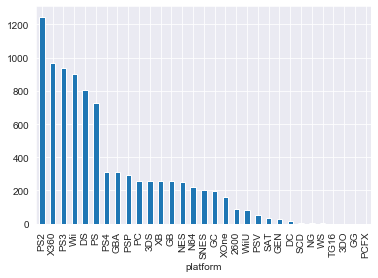

In [78]:
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

In [79]:
games.pivot_table(index='platform', columns='year_of_release',values='total_sales', aggfunc=sum)

year_of_release,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.32,63.20,51.76,56.57,43.76,27.78,15.14
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.38,5.16,5.99,1.07,0.29,NaN,NaN,NaN,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.27,130.14,119.81,147.23,145.36,119.56,85.35,26.33,11.67,1.54,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,64.97,4.89,5.57,25.49,NaN,12.18,3.60,36.03,6.37,26.90,38.00,19.76,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,61.53,74.16,56.67,77.91,34.53,5.46,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.62,52.22,51.20,28.89,27.91,11.55,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.60,4.33,12.64,0.65,8.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
pl = games.groupby('platform')['total_sales'].sum().nlargest(1)

In [81]:
pl

platform
PS2    1247.16
Name: total_sales, dtype: float64

In [82]:
print("The platform {} has the greatest total sales {} USD million".format(pl.index[0], pl[0].round()))

The platform PS2 has the greatest total sales 1247.0 USD million


In [83]:
ps2 = games.query('platform==@pl.index[0]')

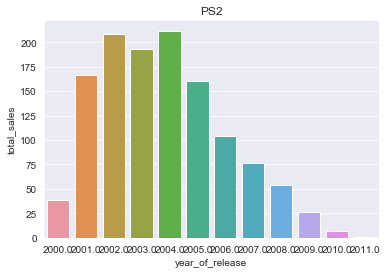

In [84]:
sns.barplot(y='total_sales'
            , x = 'year_of_release'
           ,data=ps2
           ,estimator=np.sum
            ,ci=None
           )

plt.title('PS2')
plt.show()

It is interesting, that 'PS2' was the most sol platform in 2000s, when the market was on its peak. 

After 2011 we have no sales, but this result is still the maximum.

In [85]:
games.groupby('platform')['total_sales'].sum().sort_values(ascending=True)

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       53.81
WiiU      82.19
2600      89.01
XOne     159.32
GC       198.66
SNES     200.04
N64      218.48
NES      251.05
GB       254.43
XB       256.69
3DS      258.53
PC       258.86
PSP      293.57
GBA      313.73
PS4      314.14
PS       727.58
DS       804.28
Wii      903.31
PS3      935.12
X360     966.61
PS2     1247.16
Name: total_sales, dtype: float64

#### platforms that used to be popular


In [86]:
games.pivot_table(index = 'platform', values=['year_of_release','total_sales'],
                  aggfunc={ 'year_of_release':[min,max],'total_sales':sum
                  }
                    )

total_sales year_of_release        
                 sum             max     min
platform                                    
2600           89.01          2002.0  1980.0
3DO             0.10          1995.0  1994.0
3DS           258.53          2016.0  2010.0
DC             15.95          2008.0  1998.0
DS            804.28          2013.0  1985.0
GB            254.43          2001.0  1988.0
GBA           313.73          2007.0  2000.0
GC            198.66          2007.0  2001.0
GEN            28.35          1994.0  1990.0
GG              0.04          1992.0  1992.0
N64           218.48          2004.0  1996.0
NES           251.05          1994.0  1983.0
NG              1.44          1996.0  1993.0
PC            258.86          2016.0  1985.0
PCFX            0.03          1996.0  1996.0
PS            727.58          2003.0  1994.0
PS2          1247.16          2011.0  2000.0
PS3           935.12          2016.0  2005.0
PS4           314.14          2016.0  2013.0
PSP           293.57          2015.0  2004.0
PSV            53.81          2016.0  2011.0
SAT            33.59          1999.0  1994.0
SCD             1.86          1994.0  1993.0
SNES          200.04          1999.0  1990.0
TG16            0.16          1995.0  1995.0
WS              1.42          2001.0  1999.0
Wii           903.31          2016.0  2006.0
WiiU           82.19          2016.0  2012.0
X360          966.61          2016.0  2005.0
XB            256.69          2008.0  2000.0
XOne          159.32          2016.0  2013.0

In [87]:
platforms_pivot = games.pivot_table(index = 'platform', values=['year_of_release','total_sales'],
                  aggfunc={ 'year_of_release':[min,max],'total_sales':[sum]
                  }
                    )

In [88]:
platforms_pivot.columns = platforms_pivot.columns.droplevel()

In [89]:
platforms_pivot = platforms_pivot.reset_index()

In [90]:
platforms_pivot.head()

,platform,sum,max,min
0,2600,89.01,2002.0,1980.0
1,3DO,0.10,1995.0,1994.0
2,3DS,258.53,2016.0,2010.0
3,DC,15.95,2008.0,1998.0
4,DS,804.28,2013.0,1985.0


In [91]:
platforms_pivot = platforms_pivot.rename(columns={'sum':'total_sales_at_all','max':'finish_year', 'min':'start_year'})

In [92]:
platforms_pivot

,platform,total_sales_at_all,finish_year,start_year
0,2600,89.01,2002.0,1980.0
1,3DO,0.10,1995.0,1994.0
2,3DS,258.53,2016.0,2010.0
3,DC,15.95,2008.0,1998.0
4,DS,804.28,2013.0,1985.0
5,GB,254.43,2001.0,1988.0
6,GBA,313.73,2007.0,2000.0
7,GC,198.66,2007.0,2001.0
8,GEN,28.35,1994.0,1990.0
9,GG,0.04,1992.0,1992.0


In [93]:
games.groupby(['platform','year_of_release'], sort=False)['total_sales'].sum().reset_index().groupby('platform').head(1)

,platform,year_of_release,total_sales
0,Wii,2006.0,140.19
1,NES,1985.0,53.44
4,GB,1996.0,36.03
6,DS,2006.0,119.81
11,X360,2010.0,170.55
12,PS3,2013.0,113.25
13,PS2,2004.0,211.81
14,SNES,1990.0,26.15
18,GBA,2002.0,74.16
23,PS4,2015.0,118.90


In [94]:
best_year = games.groupby(['platform','year_of_release'], sort=False)['total_sales'].sum().reset_index().groupby('platform').head(1)

In [95]:
best_year = best_year.rename(columns={'year_of_release':'best_sales_year','total_sales':'highest_sales'})

In [96]:
best_year.head()

,platform,best_sales_year,highest_sales
0,Wii,2006.0,140.19
1,NES,1985.0,53.44
4,GB,1996.0,36.03
6,DS,2006.0,119.81
11,X360,2010.0,170.55


In [97]:
platforms_pivot = platforms_pivot.merge(best_year, on='platform')

In [98]:
platforms_pivot.head()

,platform,total_sales_at_all,finish_year,start_year,best_sales_year,highest_sales
0,2600,89.01,2002.0,1980.0,1982.0,28.88
1,3DO,0.10,1995.0,1994.0,1995.0,0.08
2,3DS,258.53,2016.0,2010.0,2013.0,56.57
3,DC,15.95,2008.0,1998.0,1998.0,3.38
4,DS,804.28,2013.0,1985.0,2006.0,119.81


We have some platforms with relatively low total_sales sum. Because of that I can't say, that they were populat. For this kind of analysis I'll exclude platforms with total_sales less than 2 mln USD.

In [99]:
platforms_pivot = platforms_pivot[platforms_pivot['total_sales_at_all']>2]

In [100]:
platforms_pivot.head()

,platform,total_sales_at_all,finish_year,start_year,best_sales_year,highest_sales
0,2600,89.01,2002.0,1980.0,1982.0,28.88
2,3DS,258.53,2016.0,2010.0,2013.0,56.57
3,DC,15.95,2008.0,1998.0,1998.0,3.38
4,DS,804.28,2013.0,1985.0,2006.0,119.81
5,GB,254.43,2001.0,1988.0,1996.0,36.03


Also it is requested to analyze platforms, that are not in sales now, hence I'll exclude finish year<2016

In [101]:
platforms_pivot[platforms_pivot['finish_year']<2016]

,platform,total_sales_at_all,finish_year,start_year,best_sales_year,highest_sales
0,2600,89.01,2002.0,1980.0,1982.0,28.88
3,DC,15.95,2008.0,1998.0,1998.0,3.38
4,DS,804.28,2013.0,1985.0,2006.0,119.81
5,GB,254.43,2001.0,1988.0,1996.0,36.03
6,GBA,313.73,2007.0,2000.0,2002.0,74.16
7,GC,198.66,2007.0,2001.0,2001.0,26.62
8,GEN,28.35,1994.0,1990.0,1992.0,12.64
10,N64,218.48,2004.0,1996.0,1996.0,34.10
11,NES,251.05,1994.0,1983.0,1985.0,53.44
15,PS,727.58,2003.0,1994.0,1997.0,136.17


In [102]:
old_platforms = platforms_pivot[platforms_pivot['finish_year']<2016]

In [103]:
old_platforms['platform'].tolist()

['2600',
 'DC',
 'DS',
 'GB',
 'GBA',
 'GC',
 'GEN',
 'N64',
 'NES',
 'PS',
 'PS2',
 'PSP',
 'SAT',
 'SNES',
 'XB']

Here we can see the list of platforms, that were popular in the past, but now have zero sales.

In [104]:
platforms_pivot['finish_year'].max() - platforms_pivot['start_year'].min()

36.0

In [105]:
platforms_pivot['start_year'].count()

24

In [106]:
(platforms_pivot['finish_year'].max() - platforms_pivot['start_year'].min() ) / platforms_pivot['start_year'].count()

1.5

In [107]:
platforms_pivot.groupby('start_year')['start_year'].count()

start_year
1980.0    1
1983.0    1
1985.0    2
1988.0    1
1990.0    2
1994.0    2
1996.0    1
1998.0    1
2000.0    3
2001.0    1
2004.0    1
2005.0    2
2006.0    1
2010.0    1
2011.0    1
2012.0    1
2013.0    2
Name: start_year, dtype: int64

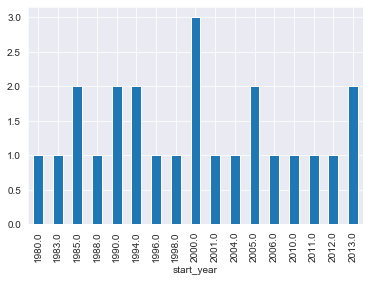

In [108]:
platforms_pivot.groupby('start_year')['start_year'].count().plot(kind='bar')
plt.show()

We have data for the range of 36 years, during this period there were 24 popular platforms.

Hence on average one new platform appears every 1.5 year.

In [109]:
old_platforms['years_to_appear'] = old_platforms['best_sales_year'] - old_platforms['start_year']

C:\Users\Yuri\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
old_platforms['years_to_fade'] = old_platforms['finish_year'] - old_platforms['best_sales_year']

C:\Users\Yuri\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [111]:
old_platforms.head()

,platform,total_sales_at_all,finish_year,start_year,best_sales_year,highest_sales,years_to_appear,years_to_fade
0,2600,89.01,2002.0,1980.0,1982.0,28.88,2.0,20.0
3,DC,15.95,2008.0,1998.0,1998.0,3.38,0.0,10.0
4,DS,804.28,2013.0,1985.0,2006.0,119.81,21.0,7.0
5,GB,254.43,2001.0,1988.0,1996.0,36.03,8.0,5.0
6,GBA,313.73,2007.0,2000.0,2002.0,74.16,2.0,5.0


In [112]:
old_platforms['years_to_appear'].describe()

count    15.000000
mean      3.333333
std       5.327378
min       0.000000
25%       0.500000
50%       2.000000
75%       3.500000
max      21.000000
Name: years_to_appear, dtype: float64

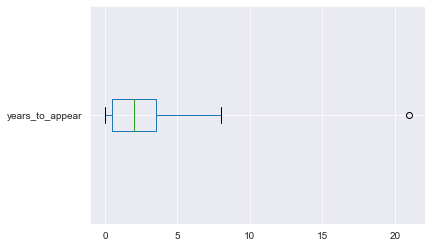

In [113]:
old_platforms['years_to_appear'].plot(kind='box', vert=False )
plt.show()

In [114]:
old_platforms['years_to_fade'].describe()

count    15.000000
mean      7.466667
std       4.189556
min       2.000000
25%       5.000000
50%       7.000000
75%       9.000000
max      20.000000
Name: years_to_fade, dtype: float64

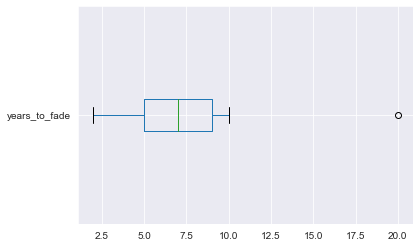

In [115]:
old_platforms['years_to_fade'].plot(kind='box', vert=False )
plt.show()

In both cases we have outliers, hence I'd like to use median values.

So, in general it takes 2 years for a platform to appear and 7 years to fade.

Such I'll set the lifespan equal to 9 years.

#### Determine the period for prognosis

By the task I know that the data for 2016 could be incomplete. Hence I'll set the period for forecasting  from 2006:
2016 and 9 full years behind

In [116]:
border = 2006

In [117]:
games[games['year_of_release']>=border]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,71.0,7.5,Unknown,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,71.0,7.5,Unknown,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,71.0,7.5,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,Unknown,0.01


In [118]:
data = games[games['year_of_release']>=border]

#### platforms are leading and outsideing in sales

#### potentially profitable platforms.

Over the whole period

In [119]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
X360    957.39
PS3     934.93
Wii     903.31
DS      656.85
PS4     314.14
PS2     267.68
3DS     258.53
PSP     242.67
PC      166.46
XOne    159.32
WiiU     82.19
PSV      53.81
GC       11.82
XB       10.77
GBA       8.86
DC        0.06
Name: total_sales, dtype: float64

In [120]:
a = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index.to_list()

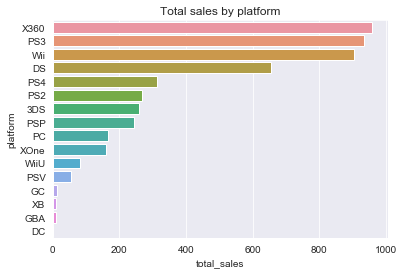

In [121]:
plt.title('Total sales by platform')
sns.barplot(data=data, y='platform' ,x='total_sales',estimator=sum, ci=False, order=a)
plt.show()

In [122]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).tail(4).index.to_list()

['GC', 'XB', 'GBA', 'DC']

Worst platforms

In [123]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(4).index.to_list()

['X360', 'PS3', 'Wii', 'DS']

Best platforms

Recent years

As it was said the data about 2016 is not full, so I'll analyze from 2015

In [124]:
data[data['year_of_release']>=2015].groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     188.15
XOne     86.29
3DS      42.92
WiiU     20.95
PS3      20.42
PC       13.77
X360     13.48
PSV      10.50
Wii       1.32
PSP       0.12
Name: total_sales, dtype: float64

In [125]:
b = data[data['year_of_release']>=2015].groupby('platform')['total_sales'].sum().sort_values(ascending=False).index.to_list()

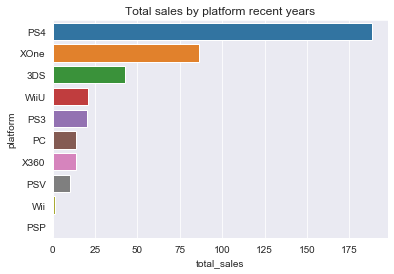

In [126]:
sns.barplot(data=data[data['year_of_release']>=2015], y='platform' ,x='total_sales',estimator=sum, ci=False, order=b)

plt.title('Total sales by platform recent years')
plt.show()

In [127]:
data[data['year_of_release']>=2015].groupby('platform')['total_sales'].sum().sort_values(ascending=False).tail(2).index.to_list()

['Wii', 'PSP']

Worst recent platforms

In [128]:
data[data['year_of_release']>=2015].groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(4).index.to_list()

['PS4', 'XOne', '3DS', 'WiiU']

Best recent platforms

In [129]:
data.pivot_table(index='platform',columns='year_of_release', values='total_sales', aggfunc=sum)

year_of_release,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,0.32,63.20,51.76,56.57,43.76,27.78,15.14
DC,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,119.81,147.23,145.36,119.56,85.35,26.33,11.67,1.54,NaN,NaN,NaN
GBA,5.46,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,11.55,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,2.85,9.28,12.46,17.05,26.15,35.16,23.45,12.66,13.63,8.52,5.25
PS2,104.24,76.10,53.90,26.40,6.59,0.45,NaN,NaN,NaN,NaN,NaN
PS3,21.38,73.19,118.79,130.93,142.96,157.98,108.27,113.25,47.76,16.82,3.60
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25


In [130]:
sales_pivot = data.pivot_table(index='platform',columns='year_of_release', values='total_sales', aggfunc=sum)

In [131]:
sales_pivot.columns = sales_pivot.columns.astype(int)

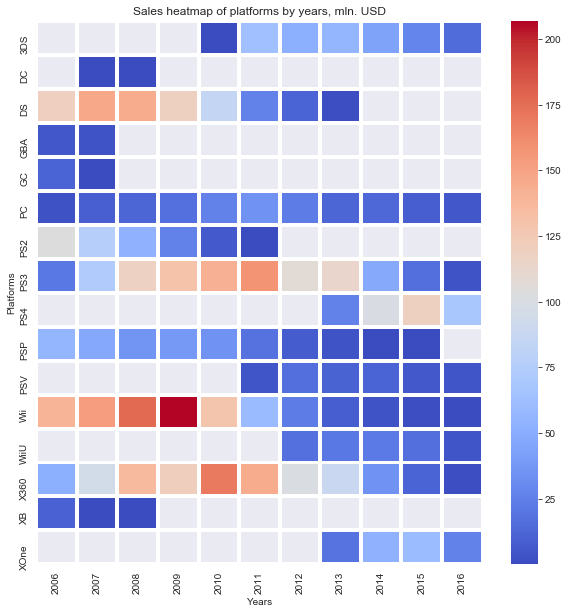

In [132]:
plt.figure(figsize=(10,10))
sns.heatmap(sales_pivot
            #,annot=True
            ,cmap='coolwarm'
           , linecolor='white'
            ,linewidths=3
           )
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("Platforms")
plt.title('Sales heatmap of platforms by years, mln. USD')
plt.show()

Best recent platforms ['PS4', 'XOne', '3DS', 'WiiU']

Best platforms for the choosed period are ['X360', 'PS3', 'Wii', 'DS']

All the time we have on the market main producers of platforms: Sony, Microsoft and Nintendo

I can assume that potentially profitable platforms are:

PS4 first of all, because it is a substitution of PS3, that is already a lot on the market.

XOne - substitution of X360

3DS - substitution of DS

and WiiU - substitution of Wii

And all the time we have constant demand from PC users. It is not high, but sustained.

In [133]:
sales_pivot[[2015,2016]].sum(axis=1).sort_values(ascending = False)

platform
PS4     188.15
XOne     86.29
3DS      42.92
WiiU     20.95
PS3      20.42
PC       13.77
X360     13.48
PSV      10.50
Wii       1.32
PSP       0.12
XB        0.00
PS2       0.00
GC        0.00
GBA       0.00
DS        0.00
DC        0.00
dtype: float64

Its clear to see, that PS4 could be the leader of the market, as it was with PS3

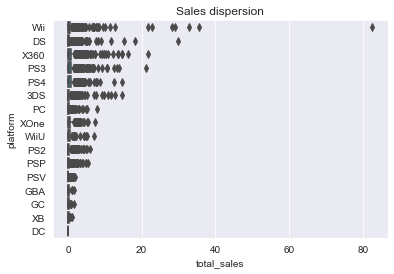

In [134]:
sns.boxplot(data=data, y='platform' ,x='total_sales',palette='rainbow'
            #,estimator=np.mean, ci=False, order=myorder
           )

plt.title('Sales dispersion')
plt.show()

<div class="alert alert-warning" role="alert">
Pretty cool, but I'd rather recommend to increase size just a little bit ;)
</div>

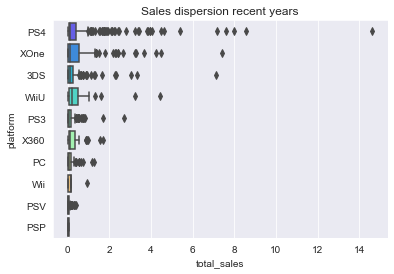

In [135]:
sns.boxplot(data=data[data['year_of_release']>=2015], y='platform' ,x='total_sales',palette='rainbow'
            #,estimator=np.mean, ci=False, order=myorder
           )

plt.title('Sales dispersion recent years')
plt.show()

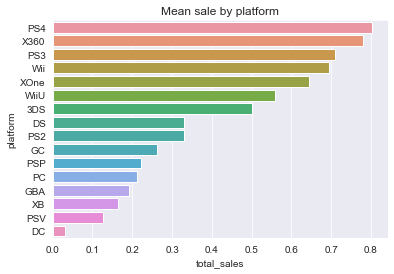

In [136]:
plt.title('Mean sale by platform')

myorder= data.groupby('platform')['total_sales'].mean().sort_values(ascending=False).index.to_list()
sns.barplot(data=data, y='platform' ,x='total_sales',estimator=np.mean, ci=False, order=myorder)
plt.show()

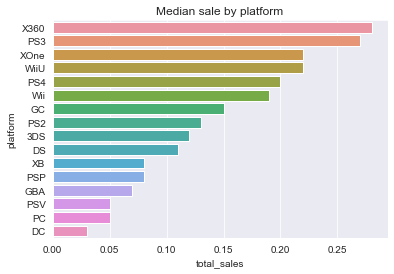

In [137]:
plt.title('Median sale by platform')

myorder= data.groupby('platform')['total_sales'].median().sort_values(ascending=False).index.to_list()
sns.barplot(data=data, y='platform' ,x='total_sales',estimator=np.median, ci=False, order=myorder)
plt.show()

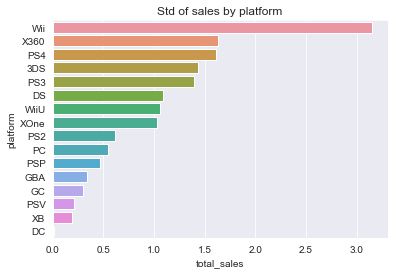

In [138]:
plt.title('Std of sales by platform')

myorder= data.groupby('platform')['total_sales'].std().sort_values(ascending=False).index.to_list()
sns.barplot(data=data, y='platform' ,x='total_sales',estimator=np.std, ci=False, order=myorder)
plt.show()

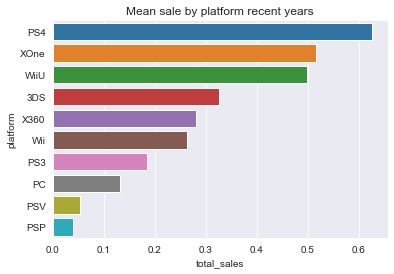

In [139]:
plt.title('Mean sale by platform recent years')

myorder= data[data['year_of_release']>=2015].groupby('platform')['total_sales'].mean().sort_values(ascending=False).index.to_list()
sns.barplot(data=data[data['year_of_release']>=2015], y='platform' ,x='total_sales',estimator=np.mean, ci=False, order=myorder)
plt.show()

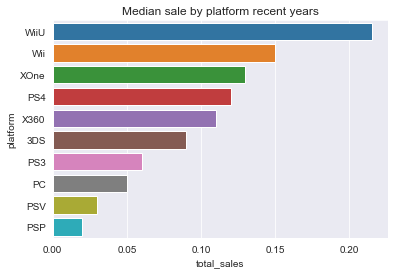

In [140]:
plt.title('Median sale by platform recent years')

myorder= data[data['year_of_release']>=2015].groupby('platform')['total_sales'].median().sort_values(ascending=False).index.to_list()
sns.barplot(data=data[data['year_of_release']>=2015], y='platform' ,x='total_sales',estimator=np.median, ci=False, order=myorder)
plt.show()

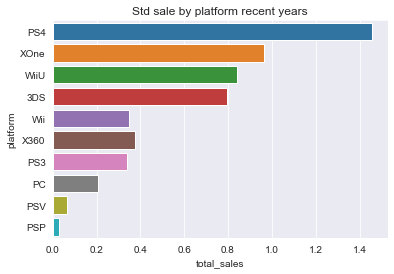

In [141]:
plt.title('Std sale by platform recent years')

myorder= data[data['year_of_release']>=2015].groupby('platform')['total_sales'].std().sort_values(ascending=False).index.to_list()
sns.barplot(data=data[data['year_of_release']>=2015], y='platform' ,x='total_sales',estimator=np.std, ci=False, order=myorder)
plt.show()

In [142]:
platforms_avg = data.pivot_table(index='platform',values='total_sales',aggfunc={'mean','median','std','max'})

In [143]:
platforms_avg['ratio'] = platforms_avg['max'] / platforms_avg['median']

In [144]:
platforms_avg.sort_values(by=['mean'], ascending=False)

,max,mean,median,std,ratio
platform,,,,,
PS4,14.63,0.801378,0.20,1.609456,73.150000
X360,21.82,0.778999,0.28,1.633930,77.928571
PS3,21.05,0.709894,0.27,1.398114,77.962963
Wii,82.54,0.694320,0.19,3.148382,434.421053
XOne,7.39,0.645020,0.22,1.036139,33.590909
WiiU,7.09,0.559116,0.22,1.058836,32.227273
3DS,14.60,0.502000,0.12,1.437252,121.666667
DS,29.80,0.330574,0.11,1.086094,270.909091
PS2,5.95,0.330062,0.13,0.616083,45.769231


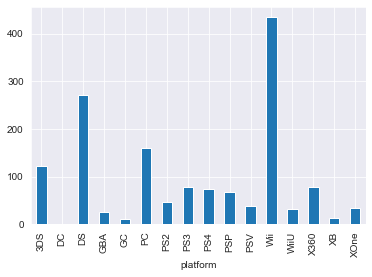

In [145]:
platforms_avg['ratio'].plot(kind='bar')
plt.show()

In [146]:
platforms_avg_short = data[data['year_of_release']>=2015].pivot_table(index='platform',values='total_sales',aggfunc={'mean','median','std','max'})

In [147]:
platforms_avg_short['ratio'] = platforms_avg_short['max'] / platforms_avg_short['median']

In [148]:
platforms_avg_short.sort_values(by=['mean'], ascending=False)

,max,mean,median,std,ratio
platform,,,,,
PS4,14.63,0.625083,0.120,1.457063,121.916667
XOne,7.39,0.516707,0.130,0.965940,56.846154
WiiU,4.44,0.498810,0.215,0.850240,20.651163
3DS,7.14,0.325152,0.090,0.798620,79.333333
X360,1.70,0.280833,0.110,0.381207,15.454545
Wii,0.95,0.264000,0.150,0.390487,6.333333
PS3,2.70,0.183964,0.060,0.342696,45.000000
PC,1.28,0.132404,0.050,0.209449,25.600000
PSV,0.41,0.053846,0.030,0.063669,13.666667


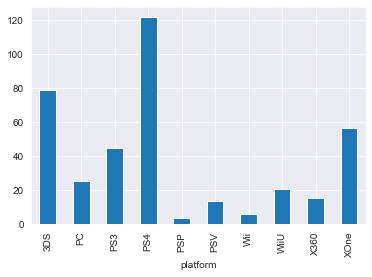

In [149]:
platforms_avg_short['ratio'].plot(kind='bar')
plt.show()

It is even more obvious, that in spite of general decrease in market capacity, PS4 is the leader platform.

Interersting situation:

"Big Money" in this industry connected to "big deals":

Top platforms keep their level due to 'bestsellers' - extreemly profitable games.

Because, average deals are about the same: we can see by their medians (suitable estimator because of significant outliers)

But the ratio of best deals to median deals is huge: 100 times in short period, 400 times in the whole period.

I can conclude that this ratio is very important factor for the prediction.

And it is also telling us, that:

PS4, 3DS and  XOne are already hot platforms

WiiU is also with high potentiality: the platform is popular and it is substitution of Wii, that is old enough. Maybe there are changes in global technologies.

#### critic_score and user_score VS total_sales

#### for one platform

I've choose PS3 as the test platform

In [150]:
test_platform = 'PS3'

In [151]:
tpd = data[data['platform']==test_platform][['platform','critic_score', 'user_score', 'total_sales']]

In [152]:
tpd.head()

,platform,critic_score,user_score,total_sales
16,PS3,97.0,8.2,21.05
34,PS3,83.0,5.3,13.79
37,PS3,88.0,3.2,13.33
41,PS3,88.0,6.4,12.63
54,PS3,84.0,7.5,10.70


In [153]:
tpd.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.521210,0.397824
user_score,0.521210,1.000000,0.039932
total_sales,0.397824,0.039932,1.000000


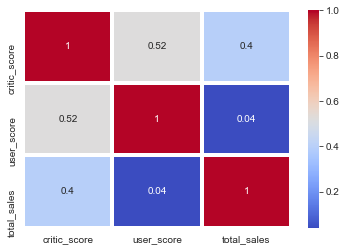

In [154]:
sns.heatmap(tpd.corr()
            ,annot=True
            ,cmap='coolwarm'
           , linecolor='white'
            ,linewidths=3
           )
plt.show()

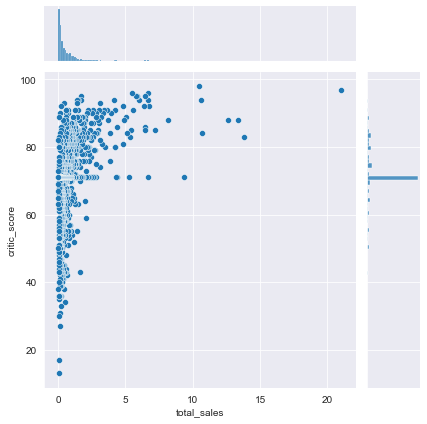

In [155]:
sns.jointplot(x='total_sales',y='critic_score',data=tpd,kind='scatter')
plt.show()

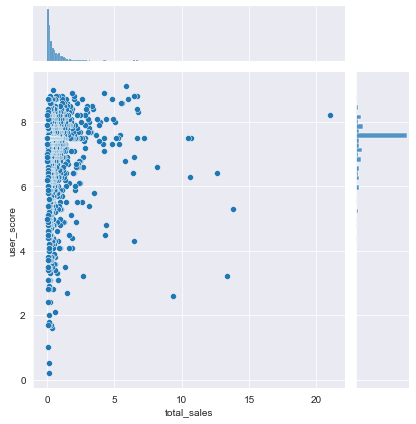

In [156]:
sns.jointplot(x='total_sales',y='user_score',data=tpd,kind='scatter')
plt.show()

Interesting situation:

Pearson coefficient of User score is close to 0,

but for Critic score it is 0.52 that is weak-medium, but as we se on scatter plot: bestsellers have score more than average (>70) 

#### compare critic_score and user_score VS total_sales on other platforms

In [157]:
data[data['platform']!=test_platform]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,71.0,7.5,Unknown,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,71.0,7.5,Unknown,0.00
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,71.0,7.5,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,Unknown,0.01


In [158]:
tpd.index

Int64Index([   16,    34,    37,    41,    54,    55,    57,    69,    81,
              104,
            ...
            16552, 16558, 16581, 16628, 16638, 16639, 16674, 16676, 16691,
            16710],
           dtype='int64', length=1317)

In [159]:
data.loc[tpd.index]['name'].head()

16                Grand Theft Auto V
34        Call of Duty: Black Ops II
37    Call of Duty: Modern Warfare 3
41           Call of Duty: Black Ops
54                    Gran Turismo 5
Name: name, dtype: object

In [160]:
data.loc[tpd.index]['name'].values

array(['Grand Theft Auto V', 'Call of Duty: Black Ops II',
       'Call of Duty: Modern Warfare 3', ..., 'G1 Jockey 4 2008',
       'Dynasty Warriors: Eiketsuden', 'Samurai Warriors: Sanada Maru'],
      dtype=object)

In [161]:
data[(data['platform']!=test_platform)&(data['name'].isin(data.loc[tpd.index]['name'].values))].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,71.0,7.5,Unknown,14.63
32,Call of Duty: Black Ops,X360,2010.0,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68


In [162]:
tpd_compare = data[(data['platform']!=test_platform)&(data['name'].isin(data.loc[tpd.index]['name'].values))][['platform','critic_score', 'user_score', 'total_sales']]

In [163]:
tpd_compare.head()

,platform,critic_score,user_score,total_sales
23,X360,97.0,8.1,16.27
29,X360,88.0,3.4,14.73
31,PS4,71.0,7.5,14.63
32,X360,87.0,6.3,14.62
35,X360,83.0,4.8,13.68


In [164]:
tpd_compare.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.404685,0.298318
user_score,0.404685,1.000000,0.007101
total_sales,0.298318,0.007101,1.000000


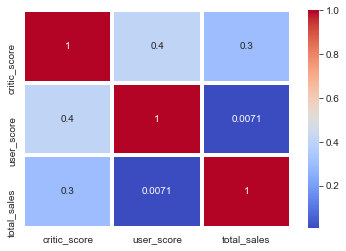

In [165]:
sns.heatmap(tpd_compare.corr()
            ,annot=True
            ,cmap='coolwarm'
           , linecolor='white'
            ,linewidths=3
           )
plt.show()

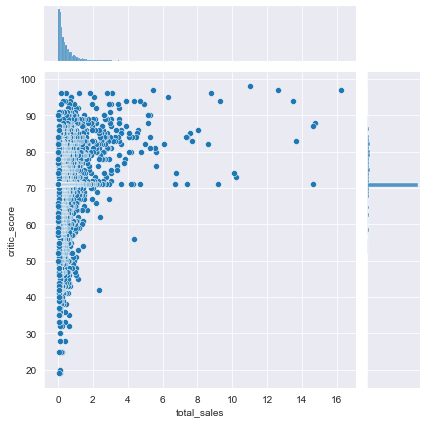

In [166]:
sns.jointplot(x='total_sales',y='critic_score',data=tpd_compare,kind='scatter')
plt.show()

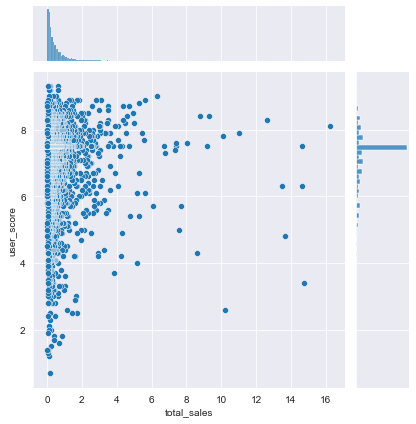

In [167]:
sns.jointplot(x='total_sales',y='user_score',data=tpd_compare,kind='scatter')
plt.show()

Interesting situation:

Pearson coefficient of User score is about 0,

Critic score it 0.3 that is weak, but as we se on scatter plot: bestsellers still have score more than average (>70) 

I can conclude, that user score doesn't affect on sales, but critic score has a slight positive influence.

###  distribution of games by genre. 
most profitable genres, genres with 
low sales

In [168]:
genres_pivot = data.pivot_table(index='genre', columns='year_of_release', values='total_sales',aggfunc='sum')

In [169]:
genres_pivot.sort_values(by=[2016], ascending=False)

year_of_release,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
genre,,,,,,,,,,,
Shooter,40.58,70.61,59.16,69.79,79.26,98.21,71.77,62.04,65.21,67.51,38.22
Action,66.53,106.12,141.63,137.69,115.46,118.81,123.91,122.79,97.58,72.02,30.11
Sports,137.71,97.73,95.44,138.17,92.05,56.33,30.41,41.17,45.15,40.84,23.49
Role-Playing,57.68,43.46,58.98,47.31,69.70,52.83,46.91,44.45,45.62,37.64,18.18
Fighting,22.42,17.49,35.11,32.04,14.69,22.41,9.18,7.09,15.85,7.90,4.47
Adventure,11.36,24.13,24.63,20.25,15.96,15.61,5.79,6.09,5.57,8.16,3.82
Platform,49.71,35.07,35.13,40.53,31.04,27.68,18.37,24.54,8.81,6.05,3.23
Racing,33.81,38.78,70.12,33.69,34.37,34.81,13.61,12.37,16.66,8.07,2.79
Misc,67.21,91.46,87.30,75.81,96.09,54.63,22.22,25.51,23.38,11.57,2.60


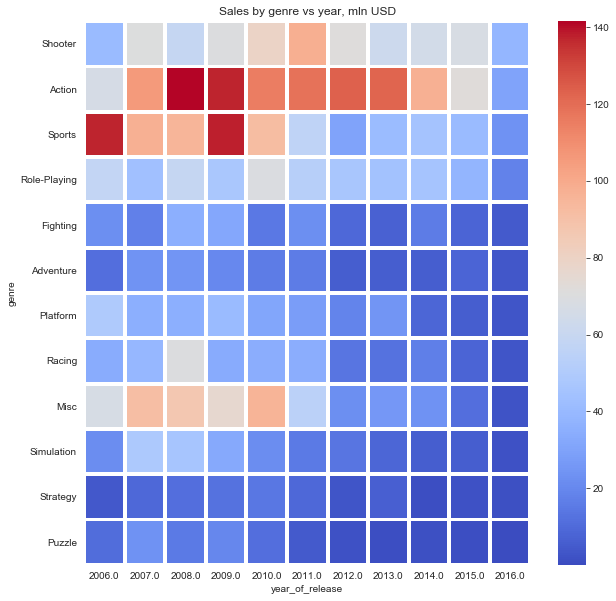

In [170]:
plt.figure(figsize=(10,10))

sns.heatmap(genres_pivot.sort_values(by=[2016], ascending=False)
            #,annot=True
            ,cmap='coolwarm'
           , linecolor='white'
            ,linewidths=3
           )
plt.title("Sales by genre vs year, mln USD")
plt.show()

In [171]:
genres_pivot.sum(axis=1).sort_values(ascending = False)

genre
Action          1132.65
Sports           798.49
Shooter          722.36
Misc             557.78
Role-Playing     522.76
Racing           299.08
Platform         280.16
Simulation       221.15
Fighting         188.65
Adventure        141.37
Puzzle            90.57
Strategy          73.77
dtype: float64

In [172]:
genres_pivot[[2015,2016]].sum(axis=1).sort_values(ascending = False)

genre
Shooter         105.73
Action          102.13
Sports           64.33
Role-Playing     55.82
Misc             14.17
Fighting         12.37
Adventure        11.98
Racing           10.86
Platform          9.28
Simulation        7.55
Strategy          2.98
Puzzle            0.72
dtype: float64

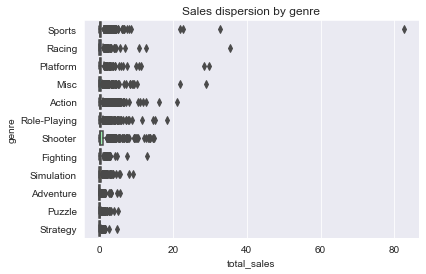

In [173]:
sns.boxplot(data=data, y='genre' ,x='total_sales',palette='rainbow'
            #,estimator=np.mean, ci=False, order=myorder
           )

plt.title('Sales dispersion by genre')
plt.show()

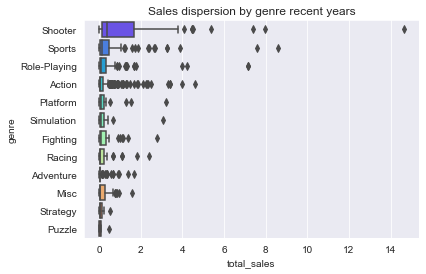

In [174]:
sns.boxplot(data=data[data['year_of_release']>=2015], y='genre' ,x='total_sales',palette='rainbow'
            #,estimator=np.mean, ci=False, order=myorder
           )

plt.title('Sales dispersion by genre recent years')
plt.show()

In [175]:
genres_avg = data.pivot_table(index='genre',values='total_sales',aggfunc={'mean','median','std','max'})

In [176]:
genres_avg['ratio'] = genres_avg['max'] / genres_avg['median']

In [177]:
genres_avg.sort_values(by=['ratio'], ascending=False)

,max,mean,median,std,ratio
genre,,,,,
Sports,82.54,0.625776,0.200,2.753989,412.700000
Misc,28.91,0.440933,0.130,1.353866,222.384615
Racing,35.52,0.530284,0.170,1.772527,208.941176
Adventure,5.55,0.138057,0.040,0.357691,138.750000
Platform,29.80,0.824000,0.225,2.559038,132.444444
Action,21.05,0.470174,0.170,1.058295,123.823529
Role-Playing,18.24,0.523808,0.150,1.335211,121.600000
Fighting,12.84,0.454578,0.150,0.929022,85.600000
Simulation,9.17,0.363136,0.130,0.772511,70.538462


In [178]:
genres_avg_short = data[data['year_of_release']>=2015].pivot_table(index='genre',values='total_sales',aggfunc={'mean','median','std','max'})

In [179]:
genres_avg_short['ratio']= genres_avg_short['max'] / genres_avg_short['median']

In [180]:
genres_avg_short.sort_values(by=['ratio'], ascending=False)

,max,mean,median,std,ratio
genre,,,,,
Action,4.62,0.236961,0.060,0.525858,77.000000
Sports,8.58,0.601215,0.120,1.292693,71.500000
Role-Playing,7.17,0.422879,0.115,1.028082,62.347826
Adventure,1.66,0.108909,0.030,0.254260,55.333333
Racing,2.42,0.258571,0.055,0.497342,44.000000
Shooter,14.63,1.305309,0.380,2.227297,38.500000
Platform,3.21,0.331429,0.100,0.667387,32.100000
Fighting,2.78,0.334324,0.090,0.549695,30.888889
Simulation,3.05,0.228788,0.100,0.531018,30.500000


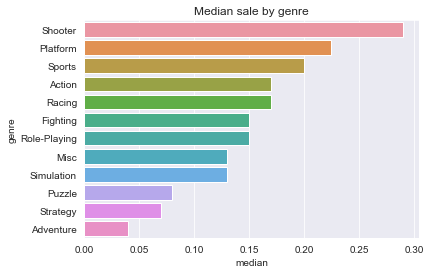

In [181]:
plt.title('Median sale by genre')

myorder = genres_avg.sort_values(by='median', ascending=False).index.to_list()

sns.barplot(data=genres_avg, y=genres_avg.index, x='median', order=myorder)

plt.show()

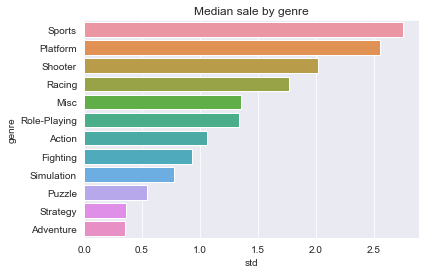

In [182]:
plt.title('Median sale by genre')

myorder = genres_avg.sort_values(by='std',ascending=False).index.to_list()

sns.barplot(data=genres_avg, y=genres_avg.index, x= 'std', order =myorder
           )
plt.show()

I can notice some changes in popularity trendes of games genres:
In general 
Action is the leader, and after that we have Sports and Shooter.
In tail we have Puzzle and Strategy.

There was a period when Action was extreemly popular.

For the recent years we have about the same picture, but the gap between leaders became smoother and we also have here Role-Playing.

Best: Shooter, Action, Sports, Role-Playing

Worst:Puzzle


Here we have simmilar situation with platforms, that "Big Win" comes around "Bestsellers"

Here we have Sports, Raceing, Platform and Misc in general

and Shooter, Sport and Role-Playing in recent years.


As an overall conclusion I'd say Sport, Shooter and Action are genres with high potential.

Strategy and Puzzle are in tail.


#### user profile for each region

top five platforms and variations in their market shares from region to region.

North America

In [183]:
data.groupby('platform')['na_sales'].sum().nlargest()

platform
X360    591.47
Wii     494.01
PS3     391.60
DS      325.06
PS2     115.75
Name: na_sales, dtype: float64

In [184]:
data.groupby('platform')['na_sales'].sum().nlargest().sum() / data['na_sales'].sum()

0.7980102690422481

In [185]:
data[data['year_of_release']>=2015].groupby('platform')['na_sales'].sum().nlargest()

platform
PS4     63.86
XOne    50.30
3DS     10.31
WiiU     8.86
X360     8.05
Name: na_sales, dtype: float64

In [186]:
data[data['year_of_release']>=2015].groupby('platform')['na_sales'].sum().nlargest().sum() / data['na_sales'][data['year_of_release']>=2015].sum()

0.9314184070096848

In the US market share of top5 platforms have 80% in general and 93% recent years

Europe

In [187]:
data.groupby('platform')['eu_sales'].sum().nlargest()

platform
PS3     328.76
X360    269.25
Wii     261.48
DS      143.30
PS4     141.09
Name: eu_sales, dtype: float64

In [188]:
data.groupby('platform')['eu_sales'].sum().nlargest().sum() / data['eu_sales'].sum()

0.7594677856270201

In [189]:
data[data['year_of_release']>=2015].groupby('platform')['eu_sales'].sum().nlargest()

platform
PS4     83.54
XOne    28.10
PC       9.10
3DS      7.39
PS3      7.30
Name: eu_sales, dtype: float64

In [190]:
data[data['year_of_release']>=2015].groupby('platform')['eu_sales'].sum().nlargest().sum() / data['eu_sales'][data['year_of_release']>=2015].sum()

0.9154386913613622

In Europe martket share of top5 platforms is 76% and recent years 92%

Japan

In [191]:
data.groupby('platform')['jp_sales'].sum().nlargest()

platform
DS     141.49
3DS    100.64
PS3     79.51
PSP     71.13
Wii     69.05
Name: jp_sales, dtype: float64

In [192]:
data.groupby('platform')['jp_sales'].sum().nlargest().sum() / data['jp_sales'].sum()

0.8204736440030572

In [193]:
data[data['year_of_release']>=2015].groupby('platform')['jp_sales'].sum().nlargest()

platform
3DS     23.55
PS4     12.05
PSV      8.41
PS3      4.97
WiiU     4.12
Name: jp_sales, dtype: float64

In [194]:
data[data['year_of_release']>=2015].groupby('platform')['jp_sales'].sum().nlargest().sum() / data['jp_sales'][data['year_of_release']>=2015].sum()

0.9943820224719093

In Japan on general top5 platfoms have 82% of the market and recent years it very close to 100% - amazing.

Also we can see, that PS4has strong position around the Globe, but in the US we have Microsoft with XOne and in Japan lider is Nintendo with 3DS

top five genres and variations in their market shares from region to region.

In [195]:
countries = ['na_sales', 'eu_sales', 'jp_sales']

In [196]:
for i in countries:
    print (i)
    print(data.groupby('genre')[i].sum().nlargest())
    print('Top5 genres market share: ',data.groupby('genre')[i].sum().nlargest().sum() / data[i].sum())
    print()

na_sales
genre
Action          538.92
Sports          399.54
Shooter         375.65
Misc            286.20
Role-Playing    199.71
Name: na_sales, dtype: float64
Top5 genres market share:  0.7489660222856493

eu_sales
genre
Action     356.35
Sports     252.51
Shooter    241.06
Misc       147.43
Racing     113.42
Name: eu_sales, dtype: float64
Top5 genres market share:  0.7374847293780163

jp_sales
genre
Role-Playing    170.58
Action          102.08
Misc             65.55
Sports           49.25
Platform         35.20
Name: jp_sales, dtype: float64
Top5 genres market share:  0.7509016291506048



In [197]:
for i in countries:
    print (i, 'in recent years')
    print(data[data['year_of_release']>=2015].groupby('genre')[i].sum().nlargest())
    print('Top5 genres market share: ',data[data['year_of_release']>=2015].groupby('genre')[i].sum().nlargest().sum() / data[data['year_of_release']>=2015][i].sum())
    print()

na_sales in recent years
genre
Shooter         48.18
Action          33.68
Sports          26.31
Role-Playing    19.82
Misc             5.58
Name: na_sales, dtype: float64
Top5 genres market share:  0.8799657421437516

eu_sales in recent years
genre
Shooter         40.28
Action          34.82
Sports          27.82
Role-Playing    17.21
Racing           6.52
Name: eu_sales, dtype: float64
Top5 genres market share:  0.8560903068811683

jp_sales in recent years
genre
Action          23.05
Role-Playing    13.41
Shooter          3.79
Misc             3.19
Adventure        2.22
Name: jp_sales, dtype: float64
Top5 genres market share:  0.8550561797752813



In all the markets in genetal top5 genres have 74%-75% market share and in recent years it is 86%-88%

Action is popular genre everywhere, but Shooter relatively less popular in Japan.

As a concluion I'd say, that the US and Europe are simmilar by the gamers behaviour to genres, but Japan has it's own preferences.

#### ESRB ratings VS sales in regions

In [198]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [199]:
countries

['na_sales', 'eu_sales', 'jp_sales']

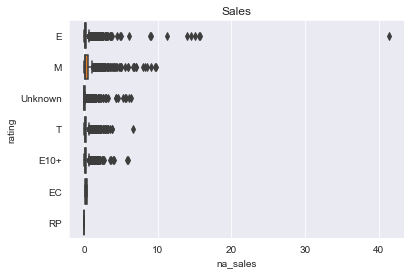

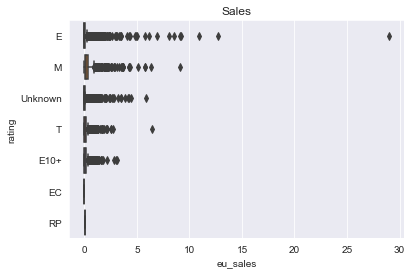

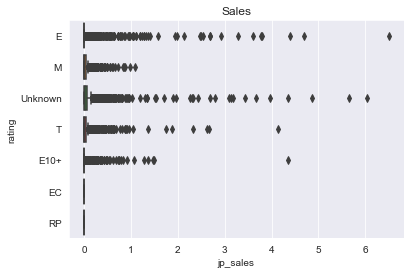

In [200]:
for i in countries:
    plt.figure()
    plt.title('Sales')
    sns.boxplot(data=data, x=i, y='rating')

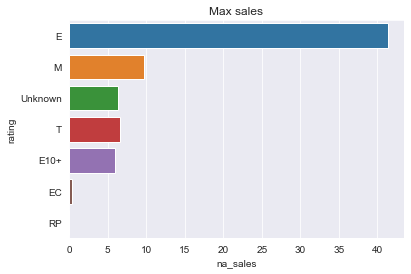

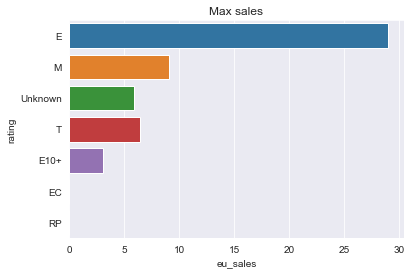

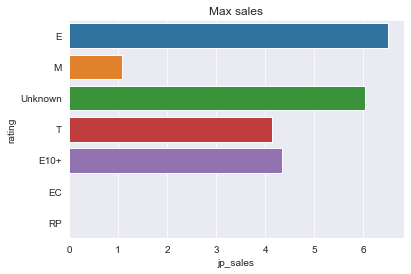

In [201]:
for i in countries:
    
    plt.figure()
    plt.title('Max sales')
    sns.barplot(data=data,x=i, y='rating', estimator=np.max, ci=False)

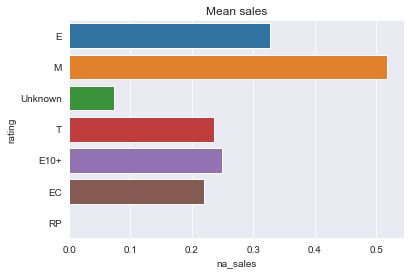

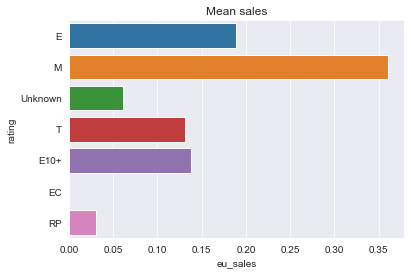

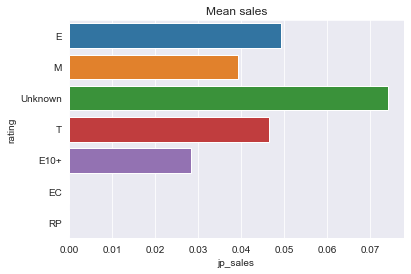

In [202]:
for i in countries:
    
    plt.figure()
    plt.title('Mean sales')
    sns.barplot(data=data,x=i, y='rating', estimator=np.mean, ci=False)

All the markets are approximately the same by their behaviour to the rating.

I can assume, that Ratings: EC and RP are not popular. All the rest have about the same distribution.

#### Test the following hypotheses:
—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

To check that all hypotjeses I choose alpha=0.05

In [203]:
alpha = .05

Average user ratings XboxOne  VS PC

I'll create the Null Hypothesis that average user ratings are equal

In [204]:
sample11= data[data['platform']=="PC"]['user_score'].to_list()

In [205]:
sample12= data[data['platform']=="XOne"]['user_score'].to_list()

In [206]:
len(sample11)

787

In [207]:
len(sample12)

247

In [208]:
len(sample11) == len(sample12)

False

we have a different number of observations in the samples

In [209]:
results1 = st.ttest_ind(sample11, sample12, equal_var=False)

In [210]:
results1

Ttest_indResult(statistic=2.0498374951600056, pvalue=0.04096498353789498)

In [211]:
if (results1.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

We reject the null hypothesis


Conclusion:

With 95% confidence level I can conclude that the average user ratings of the Xbox One and PC platforms are NOT the same.

Average user ratings genres Action VS Sports

I'll create the Null Hypothesis that average user ratings are equal:

In [212]:
sample21= data[data['genre']=="Action"]['user_score'].to_list()

In [213]:
sample22= data[data['genre']=="Sports"]['user_score'].to_list()

In [214]:
np.var(sample21) == np.var(sample22)

False

we have variance for the samples

In [215]:
results2 = st.ttest_ind(sample21, sample22, equal_var=False)

In [216]:
results2

Ttest_indResult(statistic=5.407477244262361, pvalue=7.096043542573488e-08)

In [217]:
if (results2.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

We reject the null hypothesis


Conclusion:

With 95% confidence I can conclude that the average user ratings for Sports and Action genres are NOT the same.

## Overal Conclusion

1) In general we have decrease of number of released games. The market was in peak in the period 2005-2001, and after that it has negative gap. Now we are in corridor of 400-800 games per year for all the platforms altogether.

Togeteher with that average profit per game is relatively steady, but also has negative tendency and was in corridor 0.3-07 mln USD per game.

PS2 platform, inspite of the fact, that it was on market on its peak in the 2000s, is still the champion by total sales.

On average one new platform appears every 1.5 year. In general it takes 2 years for a platform to appear and 7 years to fade.

Such the lifespan is about 9 years.


2) All the time we have on the market main producers of platforms: Sony, Microsoft and Nintendo

We have 
PS4 - substitution of PS3

XOne - substitution of X360

3DS - substitution of DS

and WiiU - substitution of Wii


And all the time we have constant demand from PC users. It is not high, but sustained.


3) Nowdays, despite general decrease PS4 looks like a leading platform.

3DS and XOne are already hot platforms.

WiiU is also with high potentiality: the platform is popular and it is substitution of Wii, that is old enough. Maybe there are changes in global technologies.

Also we can see, that PS4has strong position around the Globe, but in the US we have Microsoft with XOne and in Japan lider is Nintendo with 3DS.

In all regions these platforms are in top5 with share about 80%, but in Japan we have amazing share close to 100%.


4) "Big Money" in this industry connected to "big deals":

Top platforms keep their level due to 'bestsellers' - extreemly profitable games.

Sometimes total sales of a besteller is 400 higher than an average game.


5) User score doesn't affect on sales, but critic score has a slight positive influence.

And correlation doesn't imply causation, but all bestsellers have critic score more than average (>70).




6) For genres we have simmilar situation with platforms, that "Big Win" comes around "Bestsellers".

We have some changes in popularity trendes of games genres: There was a period when Action was extreemly popular, and after that we have Sports and Shooter. Recents years the gap between leaders became smoother. But anyway the are the genres with the highest market potential.

In tail we have Puzzle and Strategy.



The genres mentioned above are in top5 around region markets. And market share of them in recent years  is 86%-88%

Action is popular genre everywhere, but Shooter relatively less popular in Japan.

As a concluion I'd say, that the US and Europe are simmilar by the gamers behaviour to genres, but Japan has it's own preferences.



7) All the markets are approximately the same by their behaviour to the rating.

I can assume, that Ratings: EC and RP are not popular. All the rest have about the same distribution.


8) With 95% confidence level I can conclude that the average user ratings of the Xbox One and PC platforms are NOT the same.

With 95% confidence level I can conclude that the average user ratings for Sports and Action genres are NOT the same.

Such we have additional proove that for different platforms and different genres we have different user attitude, and maybe anticipations and further behaviour.


Hence, choosing correct platform and genre helps us to clear up / catch the jackpot..